In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    roc_auc_score,
)
from sklearn import svm

In [32]:
# Importando a base de dados
df_base = pd.read_csv("ecommerce_intention.csv")
df_base.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Análise Exploratória

In [33]:
df_base.shape

(12330, 18)

In [34]:
df_base.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [35]:
# Verificando se há valores vazios
df_base.isnull().sum().sort_values(ascending=False).head(10)

Administrative             14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
Administrative_Duration    14
Region                      0
Weekend                     0
dtype: int64

In [36]:
# Há poucos dados faltantes, então o removeremos
df_base.dropna(inplace=True)

In [37]:
df_base.isnull().sum().sort_values(ascending=False).head(10)

Administrative             0
Administrative_Duration    0
Weekend                    0
VisitorType                0
TrafficType                0
Region                     0
Browser                    0
OperatingSystems           0
Month                      0
SpecialDay                 0
dtype: int64

In [38]:
df_base.shape

(12316, 18)

Para fins de visualização, dividiremos os dados em variáveis contínuas e categóricas. Trataremos todas as variáveis com menos de 30 entradas únicas como categóricas.

In [39]:
# Preparando os dados para o plot
df = df_base.copy()
continuo = []
categorico = []

for i in df.columns[:-1]:
    if df.nunique()[i] >= 30:
        continuo.append(i)
    else:
        categorico.append(i)

In [40]:
continuo

['Administrative_Duration',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration',
 'BounceRates',
 'ExitRates',
 'PageValues']

In [41]:
categorico

['Administrative',
 'Informational',
 'SpecialDay',
 'Month',
 'OperatingSystems',
 'Browser',
 'Region',
 'TrafficType',
 'VisitorType',
 'Weekend']

In [42]:
df[continuo].head()

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0
1,0.0,0.0,2.0,64.000000,0.00,0.10,0.0
2,-1.0,-1.0,1.0,-1.000000,0.20,0.20,0.0
3,0.0,0.0,2.0,2.666667,0.05,0.14,0.0
4,0.0,0.0,10.0,627.500000,0.02,0.05,0.0


In [43]:
df[categorico].head()

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0.0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0.0,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0.0,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0.0,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0.0,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


# Gráficos para variáveis numéricas

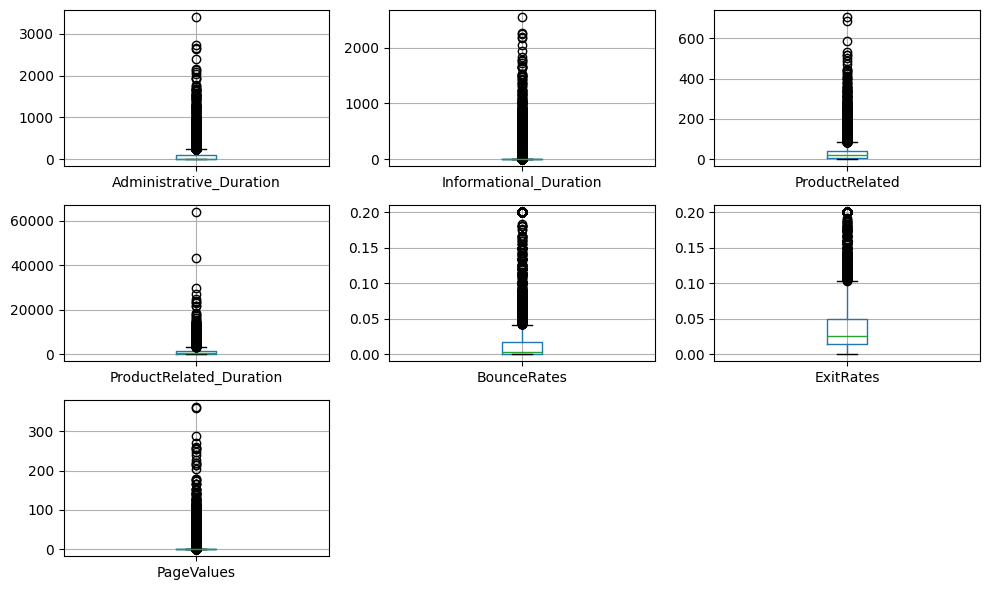

In [44]:
# Plot das variáveis contínuas
fig = plt.figure(figsize=(10, 6))

# Iterando sobre as variáveis contínuas
for i, col in enumerate(continuo):
    plt.subplot(3, 3, i + 1)
    df.boxplot(col)
    plt.tight_layout()
plt.savefig("boxplot1.png")

As Variáveis contínuas parecem estar distorcidas. Vamos aplicar transformação de logaritmo para melhor visualização desses dados.

In [45]:
df[continuo] = np.log1p(1 + df[continuo])

In [46]:
df[continuo]

,Administrative_Duration,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.693147,0.693147,1.098612,0.693147,0.788457,0.788457,0.693147
1,0.693147,0.693147,1.386294,4.189655,0.693147,0.741937,0.693147
2,0.000000,0.000000,1.098612,0.000000,0.788457,0.788457,0.693147
3,0.693147,0.693147,1.386294,1.540445,0.717840,0.760806,0.693147
4,0.693147,0.693147,2.484907,6.444926,0.703098,0.717840,0.693147
...,...,...,...,...,...,...,...
12325,4.990433,0.693147,4.007333,7.487617,0.696712,0.707558,2.656176
12326,0.693147,0.693147,1.945910,6.147934,0.693147,0.703757,0.693147
12327,0.693147,0.693147,2.079442,5.227090,0.733969,0.735568,0.693147
12328,4.343805,0.693147,2.833213,5.852202,0.693147,0.703618,0.693147


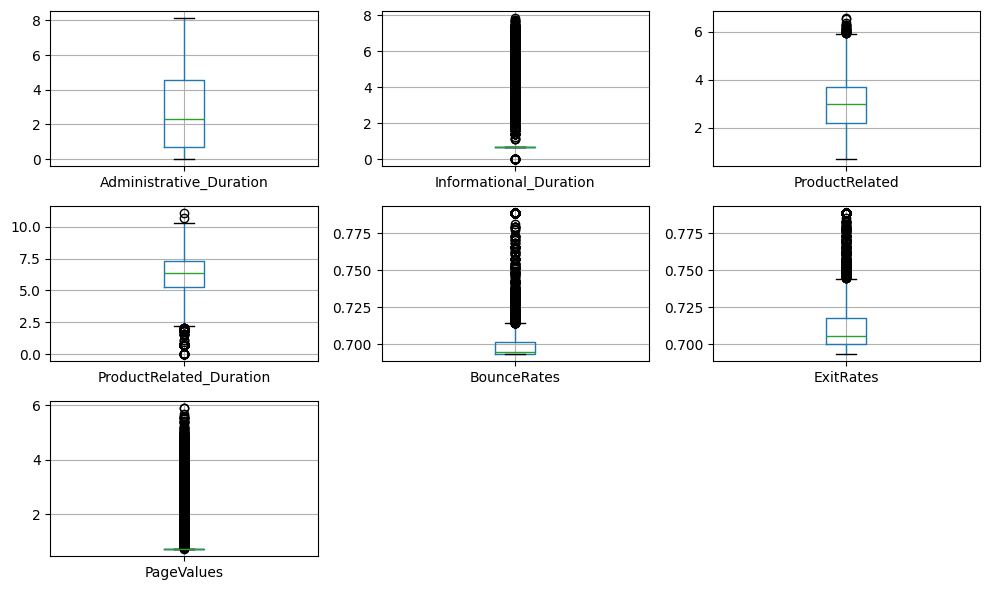

In [47]:
# Plot das variáveis contínuas após o log
fig = plt.figure(figsize=(10, 6))

# Loop pelas variáveis contínuas
for i, col in enumerate(continuo):
    plt.subplot(3, 3, i + 1)
    df.boxplot(col)
    plt.tight_layout()
plt.savefig("boxplot2.png")

Criaremos um gráfico (heatmap) para vermos a correlação de cada variável contínua

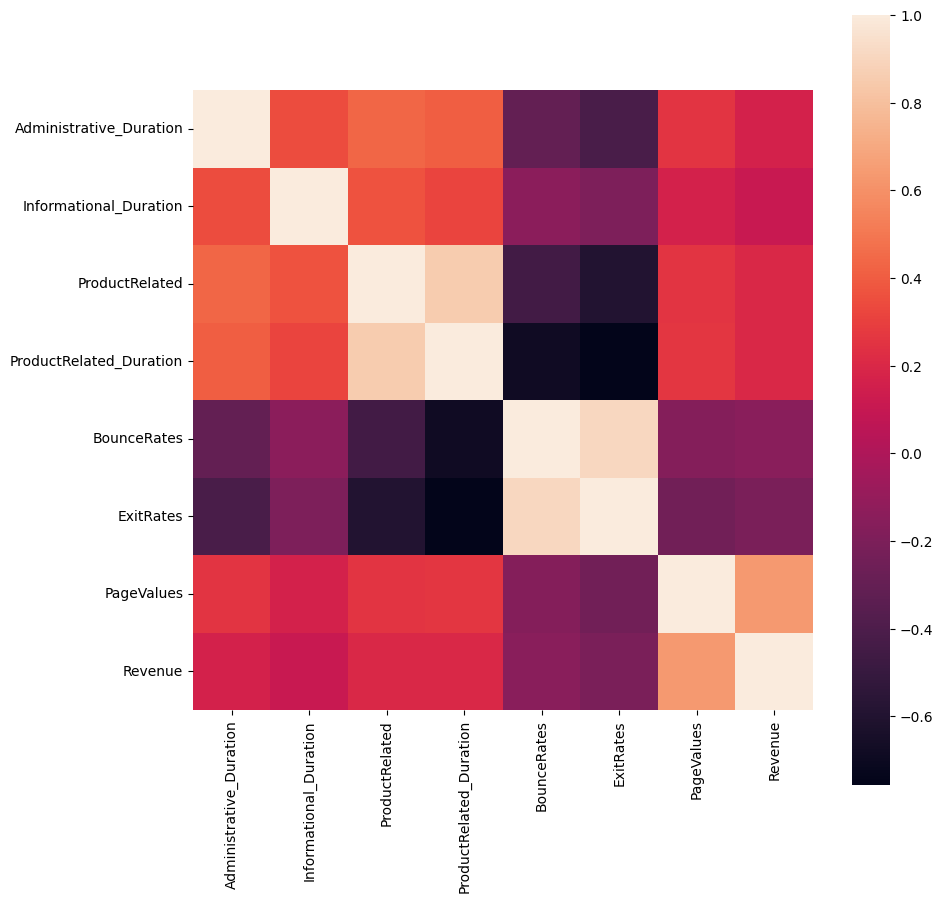

In [48]:
plt.figure(figsize = (10,10))
sns.heatmap(df[['Administrative_Duration', 'Informational_Duration', 'ProductRelated',
       'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'Revenue']].corr(), vmax=1.,square=True)
plt.show()

Visualização de gráficos de variáveis categóricas para analisar como a variável de destino é influenciada por elas.

[Text(0, 0, 'False'), Text(1, 0, 'True')]

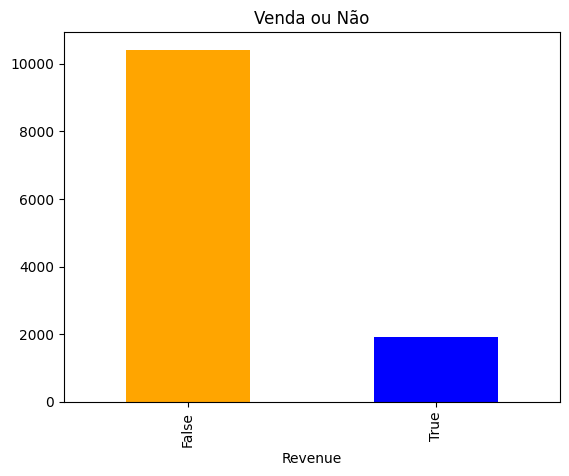

In [69]:
ax = df_base.Revenue.value_counts().plot(kind="bar", title="Venda ou Não", color=["orange", "blue"])
ax.set_xticklabels(["False", "True"])

<Axes: xlabel='VisitorType'>

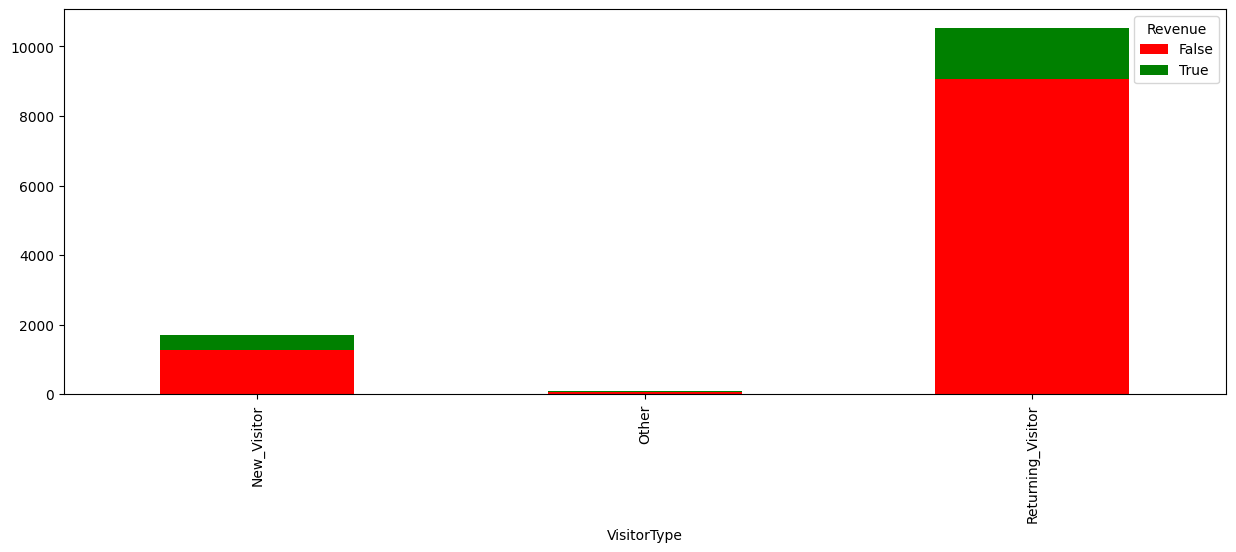

In [70]:
# Stacked Bar Tipo de Visitante x Receita
pd.crosstab(df["VisitorType"], df_base["Revenue"]).plot(kind="bar", stacked=True, figsize=(15,5), color=["red", "green"])

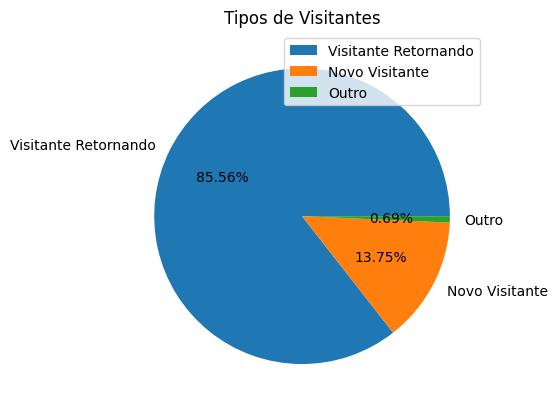

In [74]:
# Gráfico de Pizza - Tipos de Visitantes
labels = ["Visitante Retornando", "Novo Visitante", "Outro"]
plt.title("Tipos de Visitantes")
plt.pie(df["VisitorType"].value_counts(), labels=labels, autopct="%.2f%%")
plt.legend()
plt.show()

[Text(0, 0, 'Não'), Text(1, 0, 'Final de Semana')]

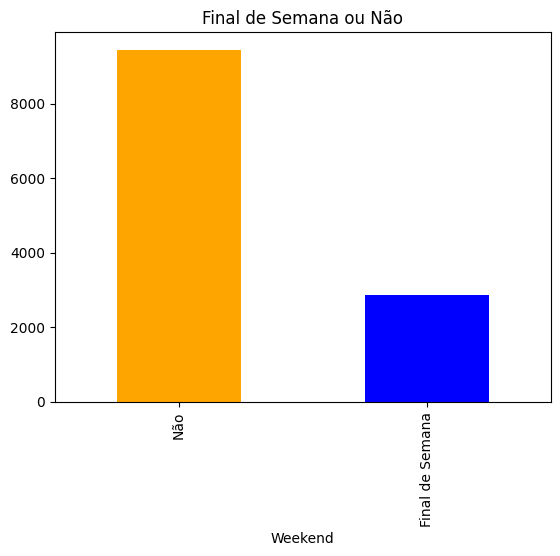

In [77]:
# bar plot - Final de Semana ou Semana
ax = df.Weekend.value_counts().plot(kind="bar", title="Final de Semana ou Não", color=["orange", "blue"])
ax.set_xticklabels(["Não", "Final de Semana"])

<Axes: xlabel='Weekend'>

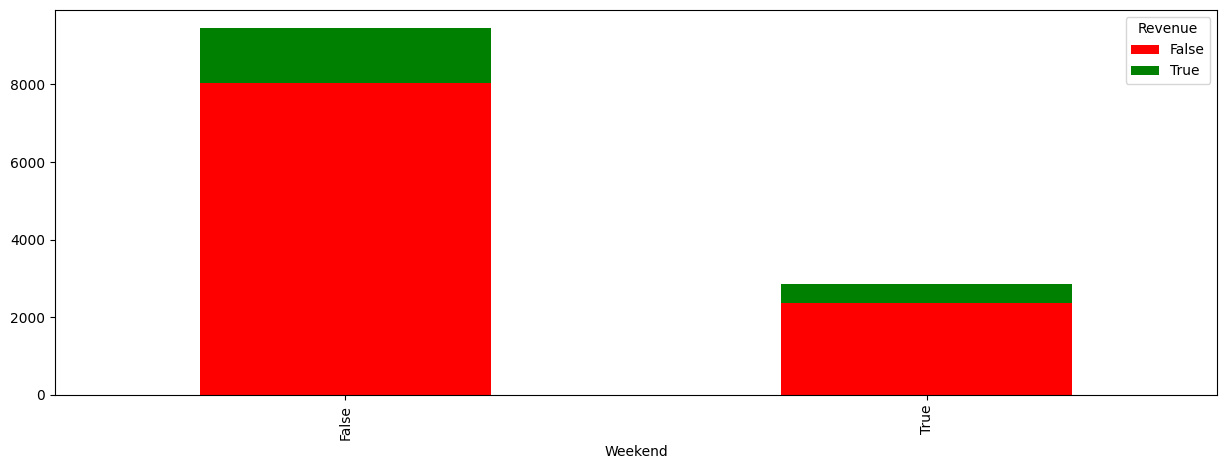

In [78]:
# Stacked Bar - Final de Semana x Receita
pd.crosstab(df["Weekend"], df_base["Revenue"]).plot(kind="bar", stacked=True, figsize=(15,5), color=["red", "green"])

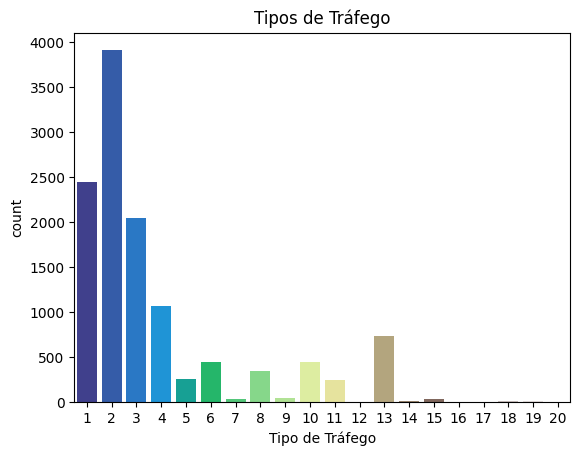

In [90]:
plt.title("Tipos de Tráfego")
plt.xlabel("Tipo de Tráfego")
sns.countplot(df, x="TrafficType", palette="terrain", hue="TrafficType", legend=False)
sns.color_palette("Paired")
plt.show()

<Axes: xlabel='TrafficType'>

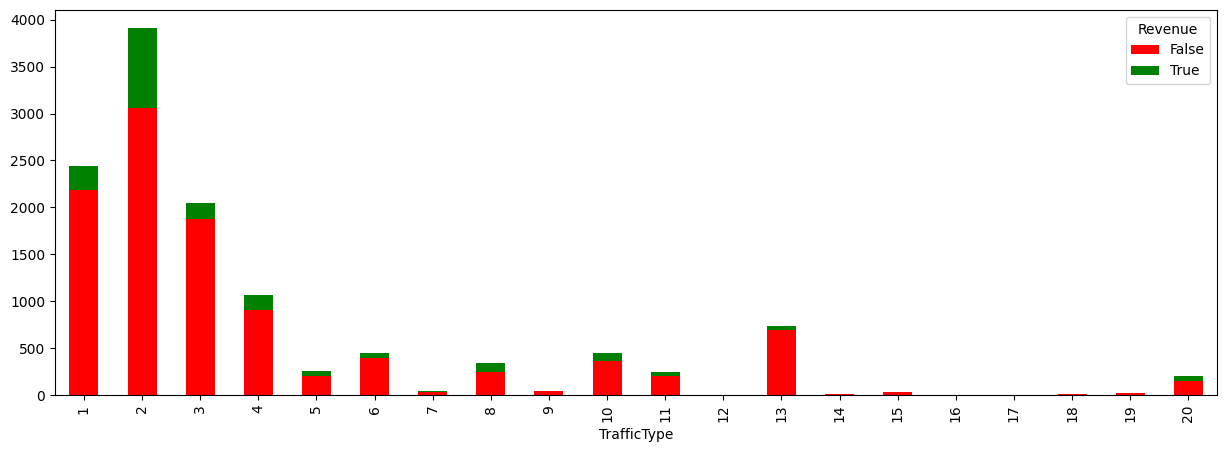

In [91]:
# Stacked Bar - Tipos de Tráfego x Receita
pd.crosstab(df["TrafficType"], df_base["Revenue"]).plot(kind="bar",stacked=True, figsize=(15,5), color=["red", "green"])

# Pré-Processamento dos Dados

In [94]:
df_base.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [95]:
#  Criando o encoder
lb = LabelEncoder()

# Aplicar o encoder nas variáveis que têm strings
df_base["Month"] = lb.fit_transform(df_base["Month"])
df_base["VisitorType"] = lb.fit_transform(df_base["VisitorType"])

# Remover valores vazios, caso gerados
df_base.dropna(inplace=True)

In [96]:
df_base.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,True,False


In [97]:
# Verificando se a variável target está balanceada
target_count = df_base.Revenue.value_counts()
target_count

Revenue
False    10408
True      1908
Name: count, dtype: int64

# Balanceamento com Oversampling

In [98]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Seed para produzir o mesmo resultado
seed = 100

# Separa X e Y
X = df_base.iloc[:,0:17] # Variáveis explicativas
Y = df_base.iloc[:,17] # Variável Target

# Cria o balanceador SMOTE
smote_bal = SMOTE(random_state=seed)

#  Aplica o balanceador
X_res, Y_res = smote_bal.fit_resample(X, Y)

C:\Users\danil\AppData\Local\Temp\ipykernel_5976\1224621949.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(Y_res, palette="OrRd")


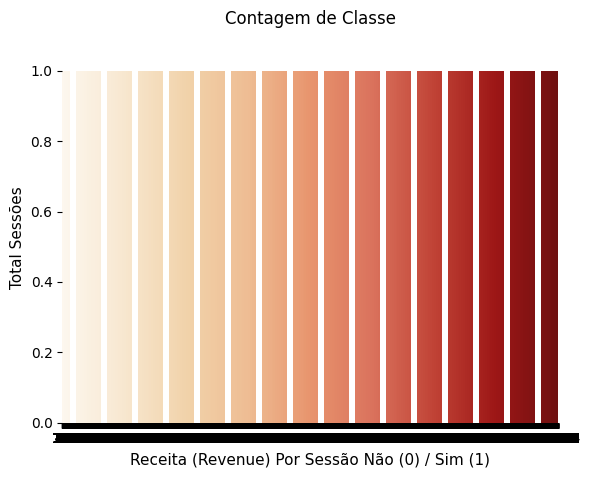

In [99]:
# PLOT
sns.countplot(Y_res, palette="OrRd")
plt.box(False)
plt.xlabel("Receita (Revenue) Por Sessão Não (0) / Sim (1)", fontsize=11)
plt.ylabel("Total Sessões", fontsize=11)
plt.title("Contagem de Classe\n")
plt.show()

In [100]:
# shape dos dados originais
df_base.shape

(12316, 18)

In [101]:
X_res.shape

(20816, 17)

In [102]:
Y_res.shape

(20816,)

In [104]:
# Ajustando X e y
# Para fins de demonstração deste exemplo vou utilizar somente 4.000 observações para não demorar muito o tempo de treinamento
# modelo

x = X_res.head(2000)
y = Y_res.head(2000)

In [105]:
# Fazendo a divisão de dados em Dados de Treino e Dados de Teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(x, y, test_size=0.3, random_state=42)

# Modelo SVM

In [108]:
# Criando o modelo
modelo = svm.SVC(kernel="linear")

In [109]:
# Treinamento
import time
start = time.time()
modelo.fit(X_treino, Y_treino)
end = time.time()
print("Tempo de Treinamento do modelo: ", end - start)

Tempo de Treinamento do modelo:  52.372665882110596


In [122]:
# Previsões
y_pred = modelo.predict(X_teste)

In [123]:
SVM_dict = {"Precision": precision_score(y_pred, Y_teste),
            "Recall":recall_score(y_pred,Y_teste),
            "F1 Score":f1_score(y_pred, Y_teste), 
            "Acurácia":accuracy_score(y_pred, Y_teste),
            "AUC":roc_auc_score(Y_teste, y_pred)}

In [124]:
print("Métricas em teste:\n")
SVM_dict

Métricas em teste:



{'Precision': 0.4727272727272727,
 'Recall': 0.6842105263157895,
 'F1 Score': 0.5591397849462365,
 'Acurácia': 0.9316666666666666,
 'AUC': 0.7253544620517097}

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_teste, y_pred)

In [126]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Sim", "Não"])

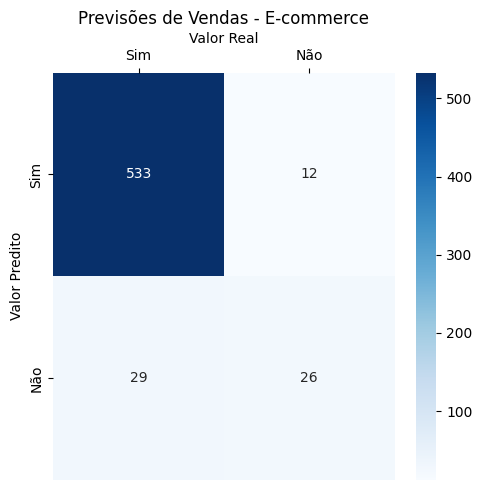

In [129]:
pd.options.display.float_format = "{:.2f}".format
plt.rcParams["figure.figsize"] = [5.00, 5.00]
plt.rcParams["figure.autolayout"] = True

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, cmap="Blues", annot=True, cbar_kws={"orientation":"vertical"},
            fmt=".0f", xticklabels=["Sim", 'Não'], 
            yticklabels=["Sim", "Não"])
ax.set_ylabel("Valor Predito")
ax.set_xlabel("Valor Real")
ax.xaxis.set_ticks_position("top")
ax.xaxis.set_label_position("top")

plt.title("Previsões de Vendas - E-commerce")
plt.tick_params(axis="both", which="major", labelsize=10, labelbottom=False, bottom=False, top=True, labeltop=True)

# Conclusão
Nosso modelo teve uma acurácia de 93% nas previsões feitas em relaçãos as vendas realizadas.

Podemos entender melhor o resultado do nosso modelo usando a métrica "Confusion Matrix". Do total dos nossos dados de teste, que é 600, o modelo conseguiu prever 533 dados de vendas realizadas e 26 de vendas não realizadas. Um total de 559 de 600 (93,17%)